In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('knn_classification_data.csv')

In [ ]:
df.head()

,Feature1,Feature2,Feature3,ClassLabel
0,3.745401,19.082659,20.516817,1
1,9.507143,12.395619,25.313546,1
2,7.319939,11.448949,25.406351,0
3,5.986585,14.894528,26.374299,1
4,1.560186,19.856505,27.260913,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('ClassLabel',axis=1)
y = df['ClassLabel']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.score(X_test,y_test)

0.5111111111111111

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1])

In [ ]:
y_test

,ClassLabel
33,1
16,0
43,0
129,0
50,1
123,1
68,1
53,1
146,1
1,1


In [ ]:
predicated_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [ ]:
predicated_df

,Actual,Predicted
33,1,0
16,0,0
43,0,1
129,0,0
50,1,1
123,1,1
68,1,0
53,1,0
146,1,1
1,1,1


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accroacy = accuracy_score(y_test,y_pred)
classification_report = classification_report(y_test,y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)

In [ ]:
print(accroacy)
print(classification_report)
print(confusion_matrix)

0.5111111111111111
              precision    recall  f1-score   support

           0       0.47      0.43      0.45        21
           1       0.54      0.58      0.56        24

    accuracy                           0.51        45
   macro avg       0.51      0.51      0.51        45
weighted avg       0.51      0.51      0.51        45

[[ 9 12]
 [10 14]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

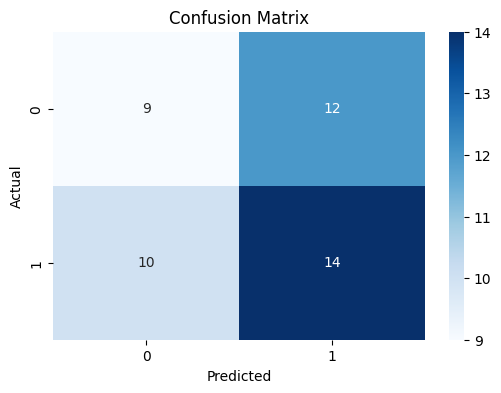

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Use hyperperameter


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
# Hyperparameter Grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}


In [ ]:
knn = KNeighborsClassifier()

# Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)



Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.5809523809523809


In [ ]:
y_pred2 = grid_search.predict(X_test)
y_pred2

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1])

In [ ]:
y_test

,ClassLabel
33,1
16,0
43,0
129,0
50,1
123,1
68,1
53,1
146,1
1,1


In [ ]:
predicated_df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred2})

In [ ]:
predicated_df2

,Actual,Predicted
33,1,0
16,0,0
43,0,1
129,0,0
50,1,1
123,1,1
68,1,0
53,1,0
146,1,1
1,1,0
